## Import Libraries

In [1]:
import os
import re
import cv2
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Slice Image Acquisition & Preprocessing

In [2]:
def readSortedSlices(path):
    
    slices = []
    for s in os.listdir(path):
        slices.append(path + '/' + s)
        
    slices.sort(key = lambda s: int(s[s.find('_') + 1 : s.find('.')]))

    ID = slices[0][slices[0].find('/') + 1 : slices[0].find('_')]
    print('CT scan of Patient %s consists of %d slices.' % (ID, len(slices)))
    
    return (slices, ID)

In [41]:
slices, PatientID = readSortedSlices('sample-dataset')
slices

CT scan of Patient ID00007637202177411956430 consists of 30 slices.


['sample-dataset/ID00007637202177411956430_0.jpg',
 'sample-dataset/ID00007637202177411956430_1.jpg',
 'sample-dataset/ID00007637202177411956430_2.jpg',
 'sample-dataset/ID00007637202177411956430_3.jpg',
 'sample-dataset/ID00007637202177411956430_4.jpg',
 'sample-dataset/ID00007637202177411956430_5.jpg',
 'sample-dataset/ID00007637202177411956430_6.jpg',
 'sample-dataset/ID00007637202177411956430_7.jpg',
 'sample-dataset/ID00007637202177411956430_8.jpg',
 'sample-dataset/ID00007637202177411956430_9.jpg',
 'sample-dataset/ID00007637202177411956430_10.jpg',
 'sample-dataset/ID00007637202177411956430_11.jpg',
 'sample-dataset/ID00007637202177411956430_12.jpg',
 'sample-dataset/ID00007637202177411956430_13.jpg',
 'sample-dataset/ID00007637202177411956430_14.jpg',
 'sample-dataset/ID00007637202177411956430_15.jpg',
 'sample-dataset/ID00007637202177411956430_16.jpg',
 'sample-dataset/ID00007637202177411956430_17.jpg',
 'sample-dataset/ID00007637202177411956430_18.jpg',
 'sample-dataset/ID000

In [4]:
def readImg(path):
    img = cv2.imread(path)
    
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def getSliceImages(slices):
    
    return list(map(readImg, slices))

In [5]:
sliceImgs = getSliceImages(slices)

In [6]:
def showImages(slices, cols, ID):
    sliceCount = len(slices)
    rows = int(sliceCount / cols)

    fig, ax = plt.subplots(nrows = rows if sliceCount % cols == 0 else rows + 1 , 
                           ncols = cols, 
                           figsize = (20, 50))
    counter = 0
    for i in range(rows):
        for j in range(cols):
            
            ax[i, j].imshow(slices[counter], cmap ='gray')
            ax[i,j].set_title('Slice %d' % (counter + 1))
            ax[i,j].axis('off')
            counter += 1

    if (sliceCount / cols) != rows:
        for j in range(sliceCount % cols):
            ax[rows,j].imshow(slices[counter], cmap ='gray')
            ax[rows,j].set_title('Slice %d' % (counter + 1))
            ax[rows,j].axis('off')
            counter += 1
            
    plt.show()

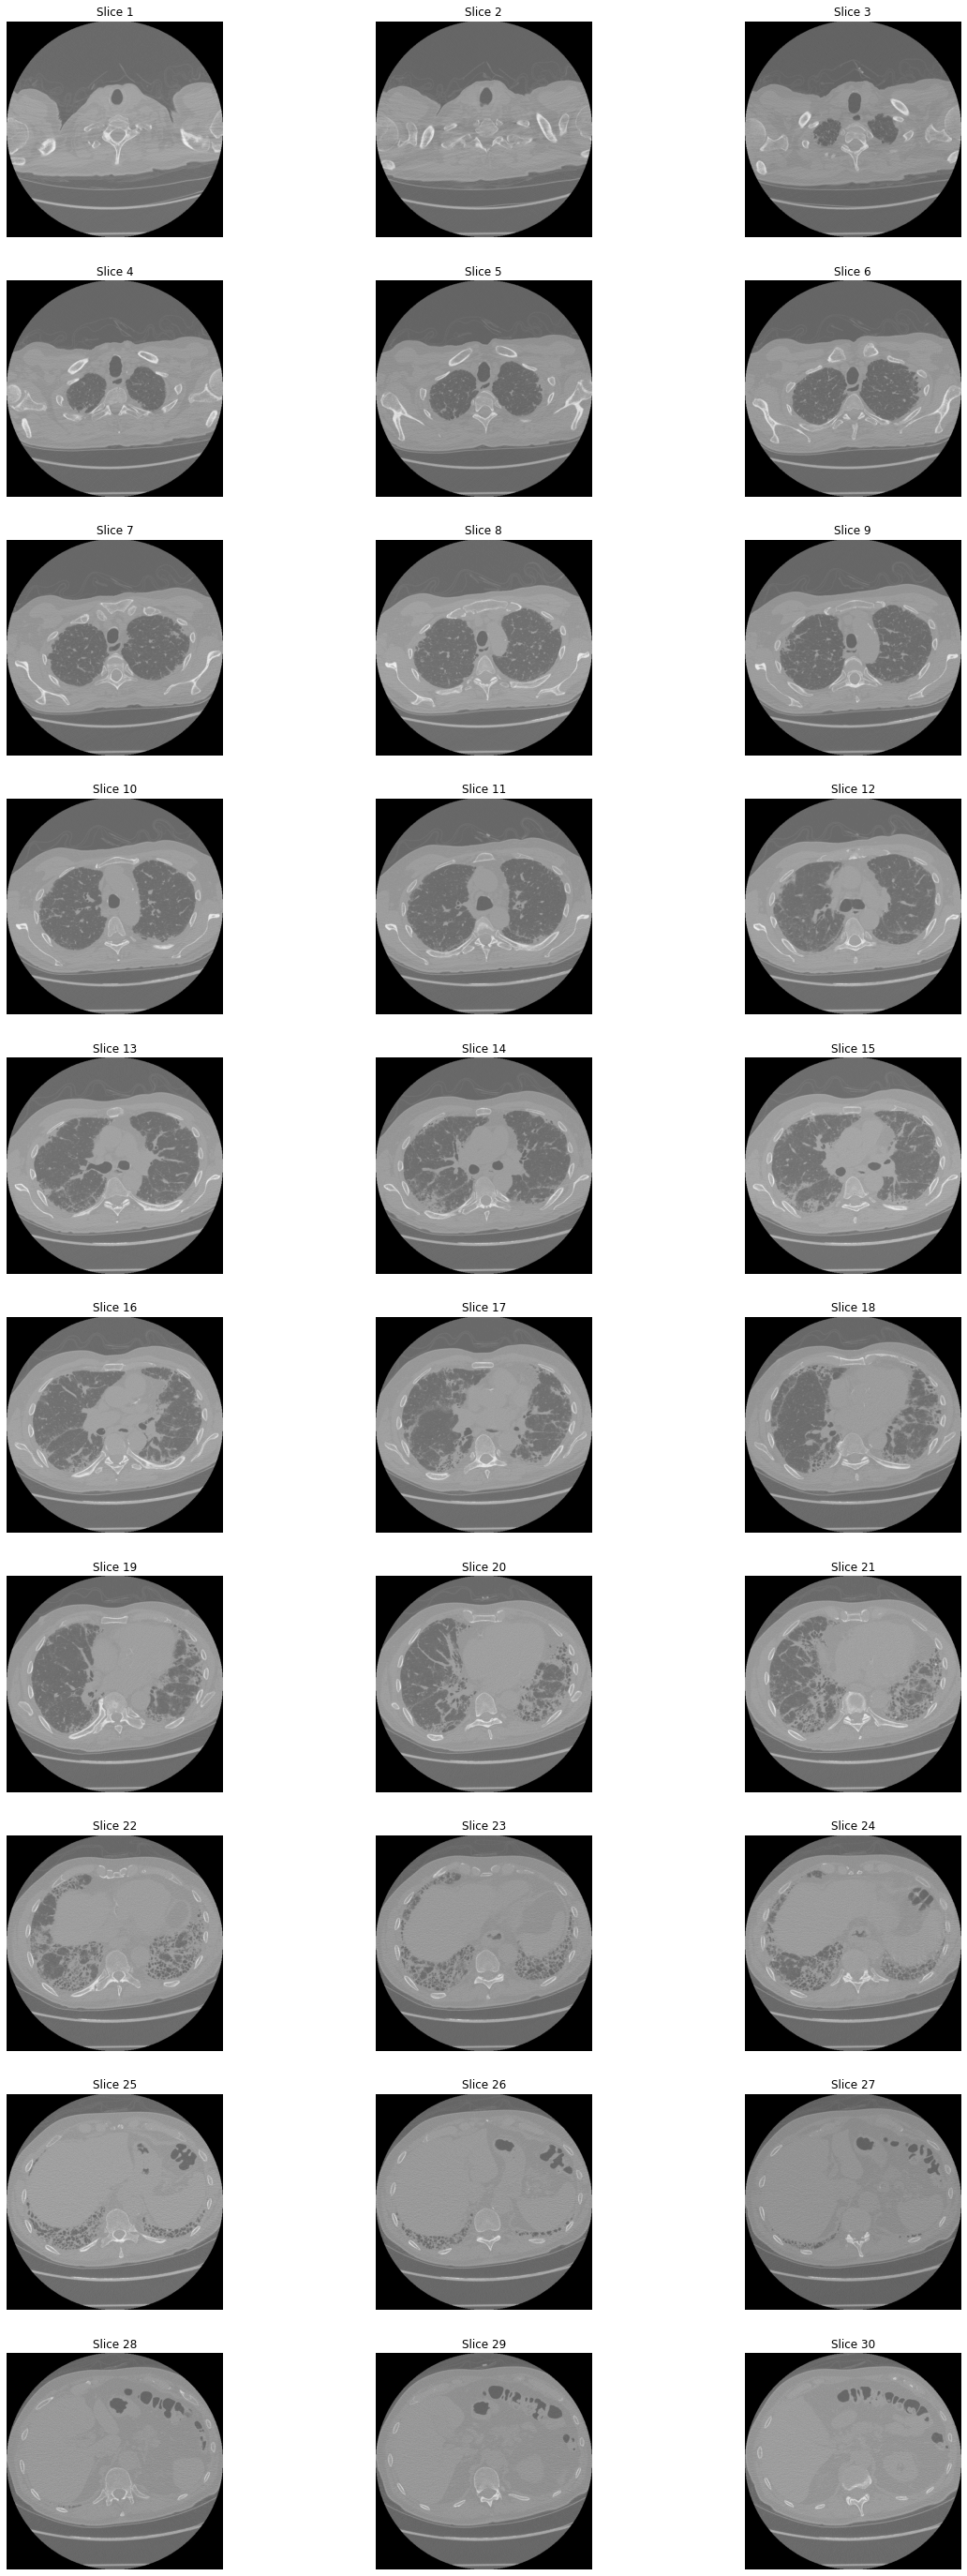

In [7]:
showImages(sliceImgs, 3, PatientID)

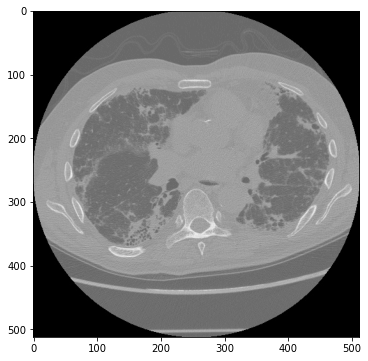

In [40]:
plt.figure(figsize = (12, 6))
im = readImg('sample-dataset/ID00007637202177411956430_16.jpg')
plt.imshow(im, cmap='gray')

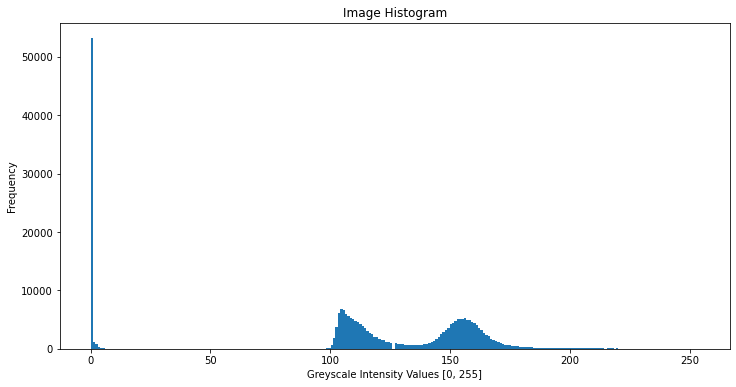

In [28]:
plt.figure(figsize = (12, 6))

plt.title('Image Histogram')
plt.xlabel('Greyscale Intensity Values [0, 255]')
plt.ylabel('Frequency')
plt.hist(im.ravel(), bins=256)
plt.show()

In [29]:
im[im < 0]

array([], dtype=uint8)

In [30]:
im[im > 255]

array([], dtype=uint8)

## Calculate Statistically Derived Thresholds 
Obtain the statistically derived thresholds needed in order to define the binary masks. These thresholds depend on the distribution of the image histogram.

In [31]:
# Calculate the average intensity of the kth slice
mu_k = im.mean()
mu_k

107.61984634399414

Text(0.5, 1.0, 'Binary Image after Thresholding with the Mean')

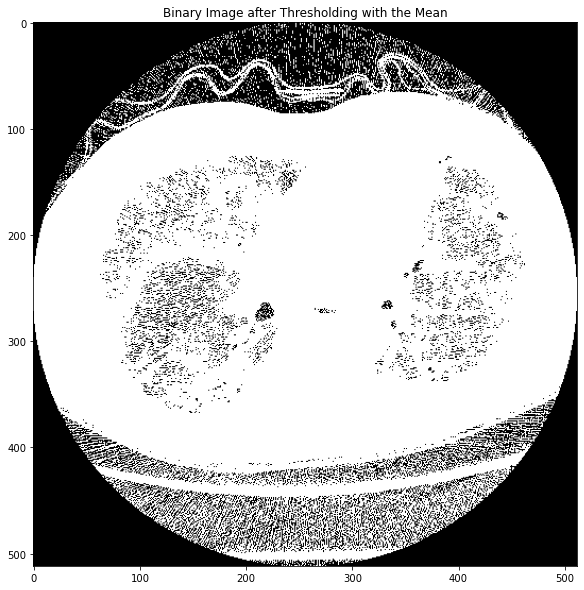

In [37]:
# Create a binary mask by thresholding with the average
bmask = cv2.threshold(im, mu_k, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(15, 10))
plt.imshow(bmask[1], cmap='gray')
plt.title('Binary Image after Thresholding with the Mean')